## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [1]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

Solutions:


-0.815553418808961

1.42961182472556

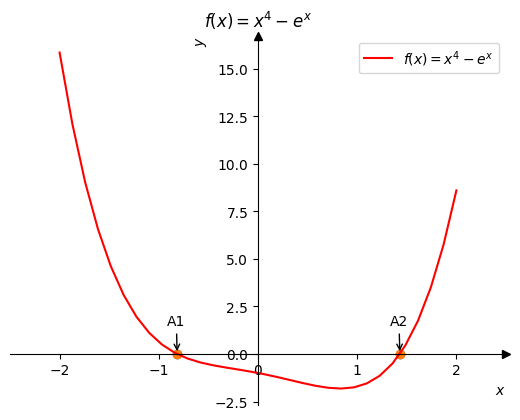

In [2]:
def config_ax(ax):
    ax.set_title("$f(x) = x^4 - e^x$")
    ax.legend(loc="upper right")
    ax.set_xlim((-2.5, 2.5))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def scatter_and_annotate(x_roots, y_roots):
    plt.scatter(x_roots, y_roots)
    for i, x_coord in enumerate(x_roots):
        plt.annotate(
            f"A{i + 1}",
            xy=(x_coord, y_roots[i]),
            xycoords="data",
            xytext=(x_coord - 0.1, y_roots[i] + 1.5),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3",
            }
        )


def f(x, lib: str = "sympy"):
    match lib:
        case "sympy":
            return x**4 - sympy.E**x
        case "numpy":
            return x**4 - np.e**x
        case _:
            return None


def main():
    x = sympy.symbols('x')
    x_space = np.linspace(-2, 2, 32)
    plt.plot(
        x_space, 
        f(x_space, "numpy"), 
        color='r',
        label="$f(x) = x^4 - e^x$"
    )
    roots_1 = [sympy.nsolve(f(x), x, o_x) for o_x in (-0.7, 1.3)]
    y_roots = [0] * len(roots_1)
    plt.scatter(roots_1, y_roots)
    scatter_and_annotate(roots_1, y_roots)
    config_ax(plt.gca())
    
    print("Solutions:")
    display(*roots_1)


if __name__ == "__main__":
    main()


### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

Solutions:


1.30133323382849

2.08594344788353

2.50217038800416

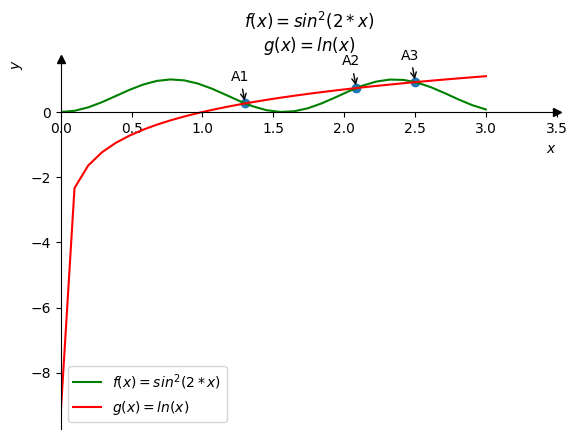

In [3]:
def config_ax(ax):
    ax.set_title("$f(x) = sin^2(2*x)$\n$g(x) = ln(x)$")
    ax.legend(loc="best")
    ax.set_xlim((0, 3.5))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    # ax.set_xticks([n * np.pi/4 for n in range(5)])
    # ax.set_xticklabels([f"${sympy.latex(n * sympy.pi/4)}$" for n in range(5)])


def scatter_and_annotate(x_roots, y_roots):
    plt.scatter(x_roots, y_roots)
    for i, x_coord in enumerate(x_roots):
        plt.annotate(
            f"A{i + 1}",
            xy=(x_coord, y_roots[i]),
            xycoords="data",
            xytext=(x_coord - 0.1, y_roots[i] + 0.7),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3",
            }
        )


def f(x, lib: str = "sympy"):
    match lib:
        case "sympy":
            return (sympy.sin(2*x))**2
        case "numpy":
            return (np.sin(2*x))**2
        case _:
            return None


def g(x, lib: str = "sympy"):
    match lib:
        case "sympy":
            return sympy.ln(x)
        case "numpy":
            return np.log(x)
        case _:
            return None


def main():
    x = sympy.symbols('x')
    x_space = np.linspace(0.0001, 3, 32)
    plt.plot(
        x_space, 
        f(x_space, "numpy"), 
        color='g',
        label="$f(x) = sin^2(2*x)$"
    )
    plt.plot(
        x_space, 
        g(x_space, "numpy"), 
        color='r',
        label="$g(x) = ln(x)$"
    )
    roots_2 = [sympy.nsolve(f(x)-g(x), x, o_x) for o_x in (1.3, 2.1, 2.5)]
    y_roots = [f(root) for root in roots_2]
    scatter_and_annotate(roots_2, y_roots)
    config_ax(plt.gca())
    
    print("Solutions:")
    display(*roots_2)

if __name__ == "__main__":
    main()


### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

Solutions:


3.21863715818210

3.38722138942523

3.68072303274915

3.81186570968780

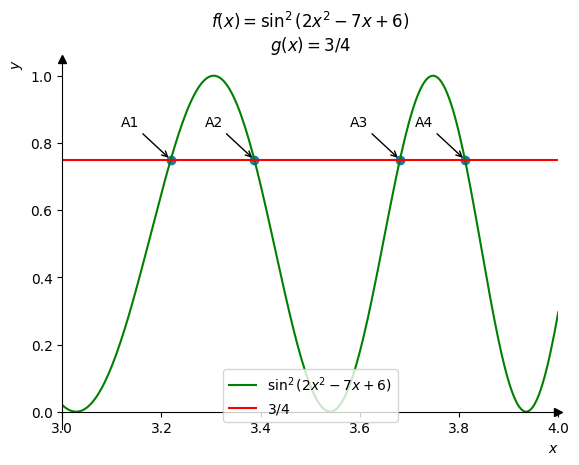

In [4]:
def config_ax(ax):
    ax.set_title("$f(x)=\sin^2(2x^2-7x+6)$\n$g(x) = 3/4$")
    ax.legend(loc="lower center")
    ax.set_xlim((3, 4))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 3))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(3, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def scatter_and_annotate(x_roots, y_roots):
    plt.scatter(x_roots, y_roots)
    for i, x_coord in enumerate(x_roots):
        plt.annotate(
            f"A{i + 1}",
            xy=(x_coord, y_roots[i]),
            xycoords="data",
            xytext=(x_coord - 0.1, y_roots[i] + 0.1),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3",
            }
        )


def f(x, lib: str = "sympy"):
    match lib:
        case "sympy":
            return (sympy.sin(2*x**2 - 7*x + 6))**2
        case "numpy":
            return (np.sin(2*x**2 - 7*x + 6))**2
        case _:
            return None


def g(x):
    return 3/4


def main():
    x_space = np.linspace(3, 4, 256)
    plt.plot(
        x_space, 
        f(x_space, "numpy"), 
        color='g',
        label="$\sin^2(2x^2-7x+6)$"
    )
    plt.plot(
        x_space, 
        np.linspace(3/4, 3/4, 256),
        color='r',
        label="$3/4$"
    )

    x = sympy.symbols('x')
    roots_3 = [
        sympy.nsolve(
            sympy.Eq(f(x), g(x)), x, interval, verify=False, solver="bisect"
        ) for interval in ([3.2, 3.3], [3.3, 3.4], [3.6, 3.7], [3.8, 3.85])
    ]
    y_roots = [f(root) for root in roots_3]
    scatter_and_annotate(roots_3, y_roots)
    config_ax(plt.gca())
    
    print("Solutions:")
    display(*roots_3)


if __name__ == "__main__":
    main()


### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [12]:
from sympy.abc import x


def f(x):
    return sympy.tan(2*x**2 + 1)**4 - 10


def main():
    interval = [0, 0.2]
    print("Solution is:")
    solution = sympy.nsolve(f(x), x, interval, solver="bisect")
    display(solution)


if __name__ == "__main__":
    main()

Solution is:


0.171066377483446

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [13]:
from sympy.abc import x, y, z


def f(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z + 3)**2


def g(x, y, z):
    return x + y + z


def h(x, y, z):
    return -2*x + 3*y - z


def roots_checker(equations, expected, *roots):
    x0, y0, z0 = roots
    checks = [equation.subs({x: x0, y: y0, z: z0}) for equation in equations]
    print("Solutions checks for each equation:")
    for i, check in enumerate(checks):
        print(f"\n{i+1}) Check for the equation {i+1}: {checks[i]}")
        if not check:
            print(f"  Expected value: {expected[i]}")
            print(f"  Calculated value: {equations[i].args[0].subs({x: x0, y: y0, z: z0})}")

equations = (
    sympy.Eq(f(x, y, z), 25, evaluate=False), 
    sympy.Eq(g(x, y, z), 0, evaluate=False), 
    sympy.Eq(h(x, y, z), 7, evaluate=False)
)

roots = sympy.nsolve(equations, (x, y, z), (0, 0, 0), verify=True)
print("Solutions are:")
display(*roots)

roots_checker(equations, (25, 0, 7), *roots)

Solutions are:


-2.08606699924184

1.22848325018954

0.857583749052298

Solutions checks for each equation:

1) Check for the equation 1: True

2) Check for the equation 2: False
  Expected value: 0
  Calculated value: -2.22044604925031E-16

3) Check for the equation 3: True


### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

#### N 50

$$
\quad\left\{
\begin{matrix}
f(x) = \frac{x^2}{4} + \frac{5x}{2} + 10\\
g(x) = \frac{(x + 2)(7x + 20)}{4}
\end{matrix}
\right.
$$

Solutions of f(x) = g(x):


-4.00000000000000

0

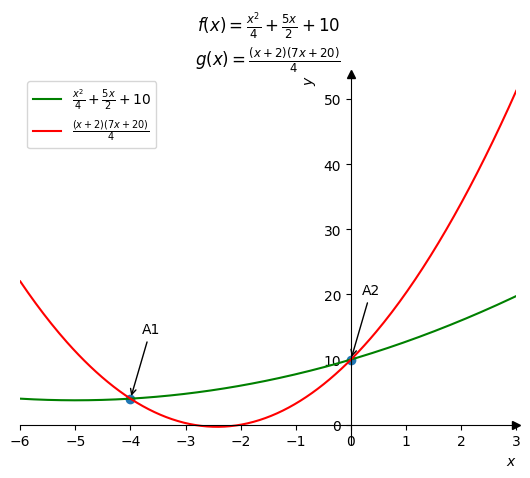

In [17]:
X_MIN = -6; X_MAX = 3


def config_axis(ax):
    ax.set_title("$f(x)=\\frac{x^2}{4}+\\frac{5x}{2}+10$\n$g(x) = \\frac{(x + 2)(7x + 20)}{4}$")
    ax.legend(loc="best")
    ax.set_xlim((X_MIN, X_MAX))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def scatter_and_annotate(x_roots, y_roots):
    plt.scatter(x_roots, y_roots)
    for i, x_coord in enumerate(x_roots):
        plt.annotate(
            f"A{i + 1}",
            xy=(x_coord, y_roots[i]),
            xycoords="data",
            xytext=(x_coord + 0.2, y_roots[i] + 10),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3",
            }
        )


def f(x):
    return x*x/4 + 5*x/2 + 10


def g(x):
    return (x + 2)*(7*x + 20)/4


def main():
    x_space = np.linspace(X_MIN, X_MAX, 256)
    plt.plot(
        x_space, 
        f(x_space), 
        color='g',
        label=r"$\frac{x^2}{4}+\frac{5x}{2}+10$"
    )
    plt.plot(
        x_space, 
        g(x_space), 
        color='r',
        label=r"$\frac{(x + 2)(7x + 20)}{4}$"
    )

    x = sympy.symbols('x')
    intersect_points = [
        sympy.nsolve(sympy.Eq(f(x), g(x)), x, approx_point) for approx_point in (-4, 0)
    ]
    y_intersects = [f(root) for root in intersect_points]
    scatter_and_annotate(intersect_points, y_intersects)
    config_axis(plt.gca())
    
    print("Solutions of f(x) = g(x):")
    display(*intersect_points)


if __name__ == "__main__":
    main()
